<a href="https://colab.research.google.com/github/thefr33radical/codeblue/blob/master/AI/ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMEANS

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum. These are usually similar to the **expectation-maximization algorithm for mixtures of Gaussian distributions** via an iterative refinement approach employed by both k-means and Gaussian mixture modeling. They both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

The term "k-means" was first used by **James MacQueen in 1967**,though the idea goes back to Hugo Steinhaus in 1956.The standard algorithm was first proposed by Stuart Lloyd of Bell Labs in 1957 as a technique for pulse-code modulation, though it wasn't published as a journal article until 1982. In 1965, Edward W. Forgy published essentially the same method, which is why it is sometimes referred to as **Lloyd-Forgy**.

k-means clustering, and its associated expectation-maximization algorithm, is a special case of a **Gaussian mixture model**, specifically, the limit of taking all covariances as diagonal, equal and small. It is often easy to generalize a k-means problem into a Gaussian mixture model. Another generalization of the k-means algorithm is the **K-SVD algorithm**, which estimates data points as a sparse linear combination of "codebook vectors". k-means corresponds to the special case of using a single codebook vector, with a weight of 1.

**Assumptions**
* A key limitation of k-means is its cluster model. 
* The concept is based on **spherical clusters** that are separable so that the mean converges towards the cluster center.
* The clusters are expected to be of **similar size**, so that the assignment to the nearest cluster center is the correct assignment.

**Applications**
* k-means clustering is rather easy to apply to even large data sets, particularly when using heuristics such as Lloyd's algorithm. It has been successfully used in market segmentation, computer vision, and astronomy among many other domains. It often is used as a preprocessing step for other algorithms, for example to find a starting configuration.

* Vector quantization :
k-means originates from signal processing, and still finds use in this domain. For example, in computer graphics, color quantization is the task of reducing the color palette of an image to a fixed number of colors k. The k-means algorithm can easily be used for this task and produces competitive results. A use case for this approach is image segmentation. Other uses of vector quantization include non-random sampling, as k-means can easily be used to choose k different but prototypical objects from a large data set for further analysis.

* Cluster analysis :

In cluster analysis, the k-means algorithm can be used to partition the input data set into k partitions (clusters).

**Advantages** 
*
*
*
*
**Disadvantages**
* The pure k-means algorithm is **not very flexible**, and as such is of limited use (except for when vector quantization as above is actually the desired use case). 
* In particular, the parameter **k is known to be hard to choose** when not given by external constraints. 
* Another limitation is that it **cannot be used with arbitrary distance** functions 
* **Cannot be used with non-numerical data.**

**Quirks**
* The number of clusters k is an input parameter: an inappropriate choice of k may yield poor results. That is why, when performing k-means, it is important to run diagnostic checks for determining the number of clusters in the data set.

### Refereces

* Kneedle : https://raghavan.usc.edu//papers/kneedle-simplex11.pdf
* Theory : https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
* Theory : https://en.wikipedia.org/wiki/K-means_clustering
* 


In [37]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 106kB/s 
     |████████████████████████████████| 204kB 44.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=4862a2f2441986f000a442c7aedc9e8e4ab78c985ae86ce91afc7489946a7ce7
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


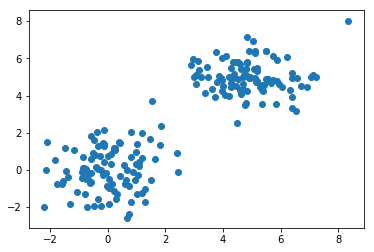

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


def KMeans(train_x,k):
  """
  user defined functions to find clusters using Kmeans
  """
  
  k=3
  
  
  cluster_one =np.random.normal(0,1,size=(100,2))
  cluster_two=np.random.normal(5,1,size=(100,2))
  
  train_x=np.append(cluster_one,cluster_two,axis=0)
  #print(train_x)
  data =pd.DataFrame(train_x)
  plt.scatter(train_x[:,0],train_x[:,1])
  
  ctr1 = random.choice([0,len(train_x)])
  ctr2 = random.choice([0,len(train_x)])
  iterations=10
  n=len(train_x)
  
  group=[0]*len(train_x)
  
  # Time Complexity = O(n X k  X d X i)
  # number of iterations
  for i in range(0,iterations):
    ctr1= new_ctr1
    ctr2=new_ctr2
    # no of data points
    for i in range(0,n):
      
      # compute eucledian distance between data points and assign to nearest centroid
      if dist1 < dist2:
        
      
      
      
    
KMeans(None, None)
  
  
  